In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(-1.0, 1.1, 0.1) # -1에서 1.1까지 0.1씩
Y = np.arange(-1.0, 1.1, 0.1) # -1에서 1.1까지 0.1씩

In [3]:
input_data =[]
correct_data = []
for x in X :
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0, 1])
        else:
            correct_data.append([1, 0])
                        
n_data = len(correct_data)   # 전체 데이터 수 설정

input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2
n_mid = 6
n_out = 2

In [4]:
wb_width = 0.01
eta = 0.1
epoch = 101
interval = 10

class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u))
        
    def backward(self, grad_y):
        #t는 타켓 즉, 정답
        delta = grad_y * (1 - self.y ) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [5]:
class OutputLayer:
    def __init__(self, n_upper, n): #이전층의 노드의 개수 현재의 노드개수
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) /np.sum(np.exp(u),axis=1, keepdims=True) #차원 변경하지 말라는 값True
        
    def backward(self, t):
        #t는 타켓 즉, 정답
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

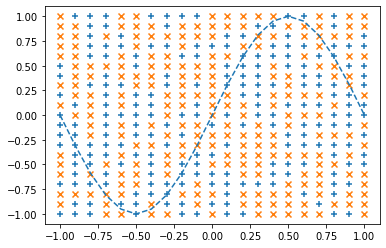

Epoch:0/101 Error:0.7316488419395816


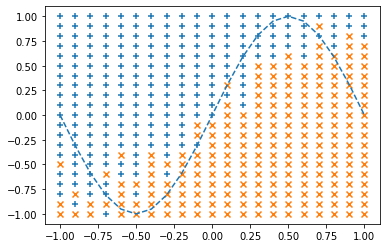

Epoch:10/101 Error:0.3388426719076381


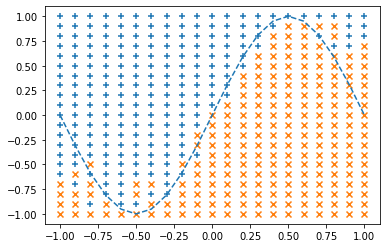

Epoch:20/101 Error:0.23398391149011008


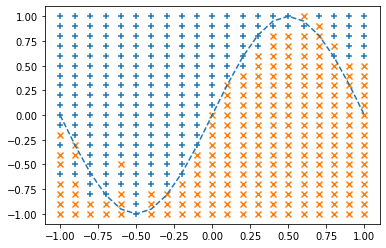

Epoch:30/101 Error:0.18930363670817604


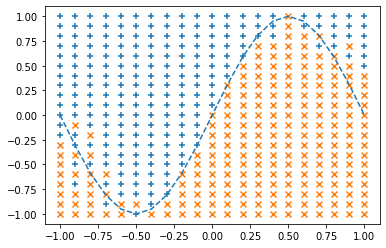

Epoch:40/101 Error:0.16147890945565346


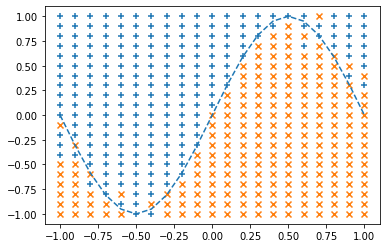

Epoch:50/101 Error:0.1456680988205065


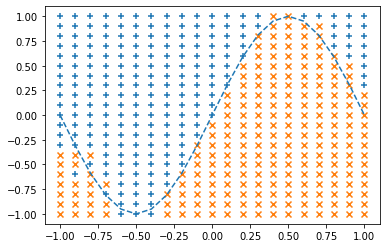

Epoch:60/101 Error:0.12058456409637155


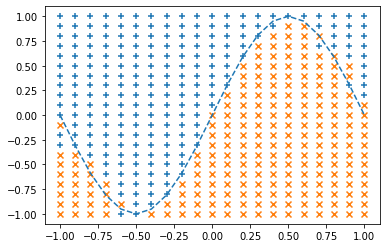

Epoch:70/101 Error:0.09197881439336886


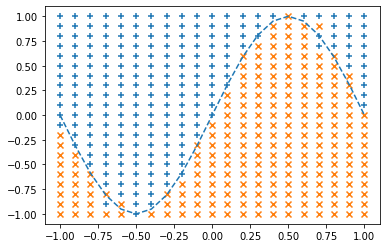

Epoch:80/101 Error:0.09377090012681782


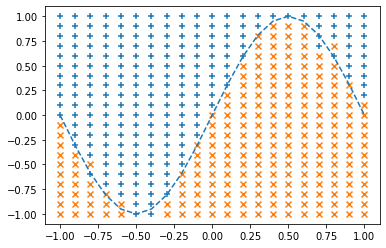

Epoch:90/101 Error:0.08307671215584156


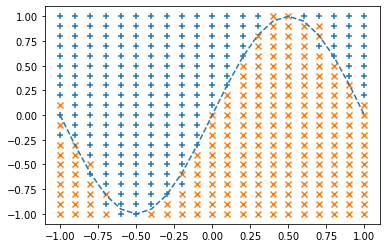

Epoch:100/101 Error:0.07262158004126806


In [7]:
sin_data = np.sin(np.pi * X) #결과 검증용

for i in range(epoch):

    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    total_error = 0
    x_1=[]
    y_1=[]
    x_2=[]
    y_2=[]
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        #순전파
        middle_layer.forward(x.reshape(1,2)) #로우1 피처 2
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        
        #가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0 :
            y = output_layer.y.reshape(-1) #행렬을 백터로 되돌림
            #교차 엔트로피 오차
            total_error += - np.sum(t * np.log(y + 1e-7))
            
            #확률 크기를 비교하여 분류
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
    if i%interval == 0:

        #출력그래프 표시
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()

        print("Epoch:" +str(i) +"/"+str(epoch),
             "Error:"+ str(total_error/n_data))

In [19]:
b = np.array([[0,1,2],
            [3,4,5]])
print(b[1,0])

3


In [20]:
b = np.array([[0,1,2],
             [3,4,5],
             [6,7,8]])
print(b[0:2,0:2])

b[0:2, 0:2] = np.array([[9,9],
                        [9,9]])
print(b)

[[0 1]
 [3 4]]
[[9 9 2]
 [9 9 5]
 [6 7 8]]
